Hackathon:https://datahack.analyticsvidhya.com/contest/janatahack-computer-vision-hackathon/

Resources:
    - https://www.analyticsvidhya.com/blog/2019/01/build-image-classification-model-10-minutes/
    
    - https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8
    
    - https://towardsdatascience.com/image-augmentation-examples-in-python-d552c26f2873
    
    - https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [62]:
#1-0.54-280

In [34]:
import os
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
from PIL import Image
import sklearn

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
images_dir = 'images'
cwd = os.getcwd()

In [7]:
train_csv = pd.read_csv(os.path.join(cwd,'train.csv'))
test_csv = pd.read_csv(os.path.join(cwd,'test.csv'))

In [8]:
train_csv.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [9]:
train_csv['emergency_or_not'].value_counts()

0    965
1    681
Name: emergency_or_not, dtype: int64

In [10]:
images = os.listdir(os.path.join(cwd,'images'))

for img in images[0:2]:
    if 'jpg' in img:
        im = Image.open(os.path.join(os.path.join(cwd,'images'),img))
        print(im.size)


(224, 224)
(224, 224)


In [11]:
y = to_categorical(train_csv['emergency_or_not'])

In [12]:
train_image = []
for im in tqdm(train_csv['image_names'].to_list()):
    img = image.load_img(os.path.join(os.path.join(cwd,'images'),im))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1646/1646 [00:02<00:00, 671.42it/s]


Traning data set is of 1646 images which will not be enough for the deep neural networks and complexity of the 
problem statement at a Hackathon. So, I will go for Data Augmentation. 

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 111, 111, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 55, 55, 64)        256       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 53, 53, 64)       

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 1316 samples, validate on 330 samples
Epoch 1/10
1316/1316 [==============================] - 6s 4ms/step - loss: 0.7747 - accuracy: 0.7264 - val_loss: 0.6462 - val_accuracy: 0.6212
Epoch 2/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.3569 - accuracy: 0.8617 - val_loss: 3.4635 - val_accuracy: 0.6000
Epoch 3/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.2853 - accuracy: 0.8913 - val_loss: 0.9188 - val_accuracy: 0.6000
Epoch 4/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.1762 - accuracy: 0.9331 - val_loss: 2.2017 - val_accuracy: 0.6000
Epoch 5/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.0886 - accuracy: 0.9688 - val_loss: 2.5759 - val_accuracy: 0.6000
Epoch 6/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 4.0185 - val_accuracy: 0.6000
Epoch 7/10
1316/1316 [==============================] - 4s 3ms/step - loss: 0.0239 - accu

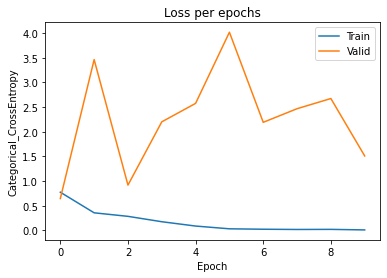

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Categorical_CrossEntropy')
plt.title('Loss per epochs')
plt.legend(['Train','Valid'])

In [32]:
val_pred = model.predict_classes(X_test)

In [50]:
y[:,1]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [44]:
train_csv['emergency_or_not'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    1
9    0
Name: emergency_or_not, dtype: int64

In [52]:
sklearn.metrics.precision_recall_fscore_support(y_test[:,1],val_pred,average='macro')

(0.8152866242038217, 0.5606060606060606, 0.49482685810810806, None)

In [28]:
test_image = []
for i in tqdm(test_csv['image_names'].to_list()):
    img = image.load_img(os.path.join(os.path.join(cwd,'images'),im))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 706/706 [00:00<00:00, 828.11it/s]


In [29]:
prediction = model.predict_classes(test)

In [30]:
np.unique(prediction)

array([0])

In [57]:
test_csv['emergency_or_not'] = prediction

In [61]:
test_csv.to_csv('submission.csv',index=False)